# Digit Recognition using CNN
## Importing Stuff

In [46]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [47]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [48]:
X_train.shape

(60000, 28, 28)

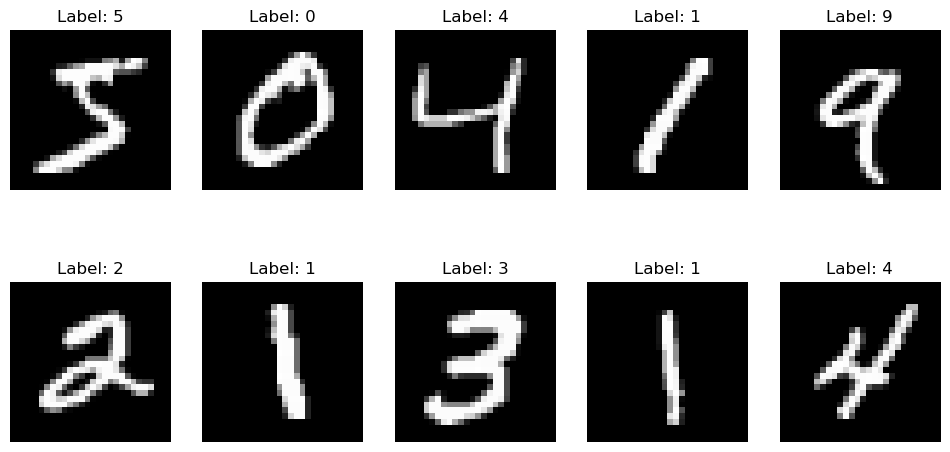

In [49]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Define a function to visualize the dataset
def visualize_mnist(images, labels, num_samples=10):
    plt.figure(figsize=(12, 6))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

# Visualize a few samples from the training dataset
visualize_mnist(X_train, y_train)


In [50]:
y_train.shape

(60000,)

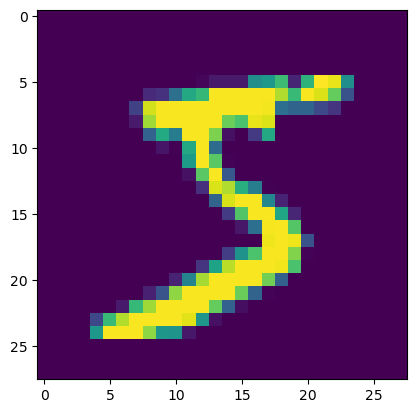

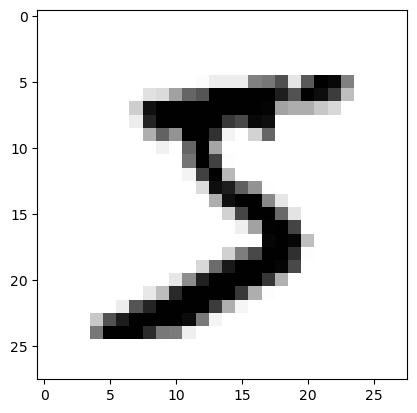

In [51]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.show()

plt.imshow(X_train[0],cmap=plt.cm.binary)

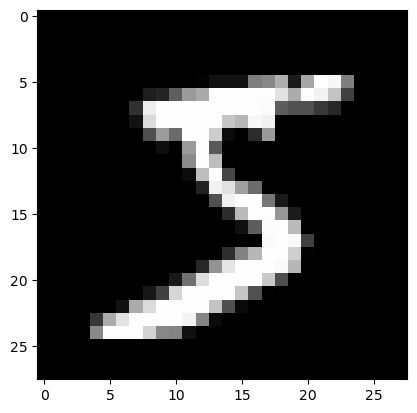

5


In [52]:
## Looking at a sample
plt.imshow(X_train[0], cmap="gray")
plt.show()
print (y_train[0])

## Data Preprocessing
### Reshaping Stuff


In [53]:
## Checking out the shapes involved in dataset
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [54]:
# Reshaping so as to convert images for our model
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [55]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


### One-Hot Encoding


In [56]:
### Lets one hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Building the model
Let's build the model

In [57]:
from keras.layers import Dense, Flatten, MaxPooling2D, Dropout
from keras.layers  import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [58]:
## Declare the model
model = Sequential()

## Declare the layers
layer_1 = Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = MaxPooling2D(pool_size=2)
layer_3 = Conv2D(32, kernel_size=3, activation='relu')
layer_4 = MaxPooling2D(pool_size=2)
layer_5 = Dropout(0.5)
layer_6 = Flatten()
layer_7 = Dense(128, activation="relu")
layer_8 = Dropout(0.5)
layer_9 = Dense(10, activation='softmax')

## Add the layers to the model
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)
model.add(layer_5)
model.add(layer_6)
model.add(layer_7)
model.add(layer_8)
model.add(layer_9)

## Compiling the model
Compiling the model takes three parameters:
- __Optimizer__ - It controls the learning rate. We will be using 'adam' optimizer. It is a very good optimizer as it utilises the perks of both Stochastic gradient and RMSprop optimizers.
- __Loss function__ - We will be using 'categorical_crossentropy' loss function. It is the most common choice for classification. A lower score corresponds to better performance.
- __Metrics__ - To make things easier to interpret, we will be using 'accuracy' metrix to see the accuracy score on the validation set while training the model.

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Training the model

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 34s 18ms/step - loss: 0.9832 - accuracy: 0.7580 - val_loss: 0.1313 - val_accuracy: 0.9639
Epoch 2/3
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2942 - accuracy: 0.9122 - val_loss: 0.0852 - val_accuracy: 0.9757
Epoch 3/3
1875/1875 [==============================] - 42s 23ms/step - loss: 0.2192 - accuracy: 0.9357 - val_loss: 0.0600 - val_accuracy: 0.9802


In [ ]:
model.save('C:/Users/Raj/Downloads/pbl/pr/digit.h5')

Yayyyy!!!! The model seems to be ready after 3 epochs with an amazing accuracy around 97%

## Predicting and Testing

1/1 [==============================] - 0s 72ms/step
Prediction (Softmax) from the neural network:

 [[9.99999881e-01 6.01475196e-13 3.50512579e-08 1.49430829e-10
  3.36583643e-11 1.31055378e-09 2.24104770e-08 5.56548774e-12
  1.28221089e-07 1.15869305e-08]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


--------- Prediction --------- 




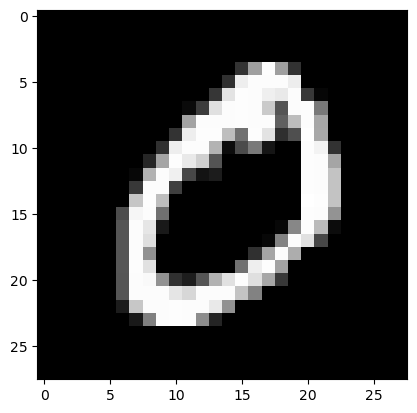



Final Output: 0


In [ ]:
example = X_train[1]
prediction = model.predict(example.reshape(1, 28, 28, 1))
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))

print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))


## Let's test our model on a real image
### For that first of all, we will preprocess the image
These are the steps for preprocessing the image:
- Convert that image to greyscale
- Binarize(threshold) the greyscaled image in such a way that only the digits in the image are white and rest is black
- Using the binarized image, find contours in the image. Here, contours will provide us the individual digits in the image
- Now, we have the digits. But we have to modify it further in such a way that it becomes a lot more similar to the images present in the training dataset.
- Now, looking at an image in dataset. We can infer that the image has to be of shape (28, 28), it should contain the digit white colored and background black colored, and the digit in the image is not stretched to the boundaries, instead, around the digit, in each of the four sides, there is a 5 pixel region (padding) of black color. (You''ll understand this fully if you check out any of the image from the dataset).
- So, now for modifying our image, we'll resize it to (18,18)
- Then, we will add a padding of zeros (black color) of 5 pixels in each direction (top, bottom, left, right).
- So, the final padded image will be of the size (5+18+5, 5+18+5) = (28, 28), which is what we wanted.




----------------Contoured Image--------------------


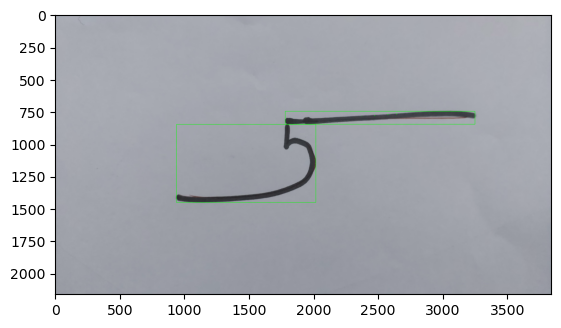

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('C:/Users/Raj/Downloads/pbl/pr/WhatsApp Image 2024-04-16 at 15.26.55_c9427556.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)

# Find contours (OpenCV 3.x style)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

preprocessed_digits = []

for c in contours:
    x, y, w, h = cv2.boundingRect(c)

    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x, y), (x + w, y + h), color=(0, 255, 0), thickness=2)

    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]

    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18, 18))

    # Padding the digit with 5 pixels of black color (zeros) on each side to produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5, 5), (5, 5)), "constant", constant_values=0)

    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)

print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()

inp = np.array(preprocessed_digits)


## Let's predict stuff !!
Here, in the prediction, Alongside the digit and predicted output, I'll be showing the softmaxed output of a prediction and the hardmaxed form of it.

1/1 [==============================] - 0s 24ms/step


---------------------------------------


=========PREDICTION============ 




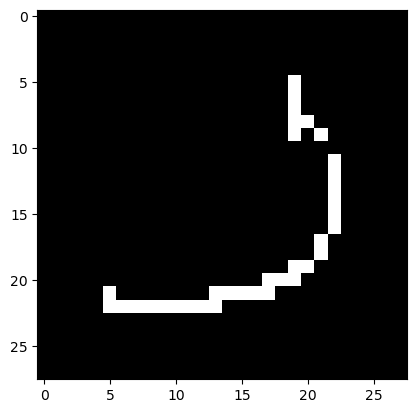



Final Output: 5

Prediction (Softmax) from the neural network:

 [[2.6500293e-06 4.0608254e-05 1.1095217e-06 1.0280161e-01 1.1402630e-05
  8.9704466e-01 1.1860637e-05 4.7314202e-06 1.2564460e-06 8.0064376e-05]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------


1/1 [==============================] - 0s 22ms/step


---------------------------------------


=========PREDICTION============ 




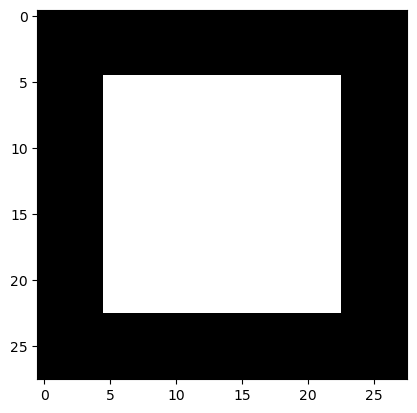



Final Output: 0

Prediction (Softmax) from the neural network:

 [[0.47336334 0.0014988  0.02112627 0.00176772 0.03293097 0.0156992
  0.17183475 0.00091239 0.26029515 0.02057143]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


1/1 [==============================] - 0s 20ms/step


---------------------------------------


=========PREDICTION============ 




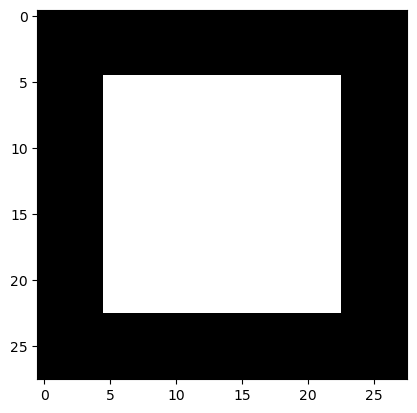



Final Output: 0

Prediction (Softmax) from the neural network:

 [[0.47336334 0.0014988  0.02112627 0.00176772 0.03293097 0.0156992
  0.17183475 0.00091239 0.26029515 0.02057143]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


1/1 [==============================] - 0s 20ms/step


---------------------------------------


=========PREDICTION============ 




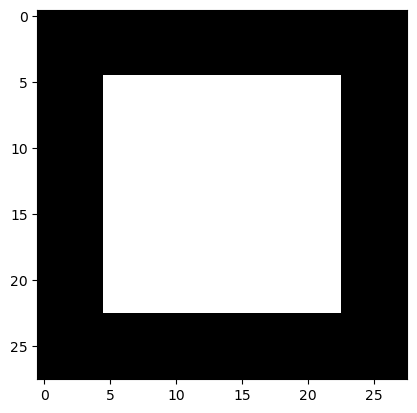



Final Output: 0

Prediction (Softmax) from the neural network:

 [[0.47336334 0.0014988  0.02112627 0.00176772 0.03293097 0.0156992
  0.17183475 0.00091239 0.26029515 0.02057143]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


1/1 [==============================] - 0s 26ms/step


---------------------------------------


=========PREDICTION============ 




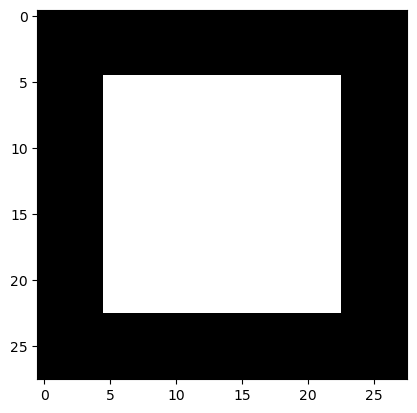



Final Output: 0

Prediction (Softmax) from the neural network:

 [[0.47336334 0.0014988  0.02112627 0.00176772 0.03293097 0.0156992
  0.17183475 0.00091239 0.26029515 0.02057143]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


1/1 [==============================] - 0s 19ms/step


---------------------------------------


=========PREDICTION============ 




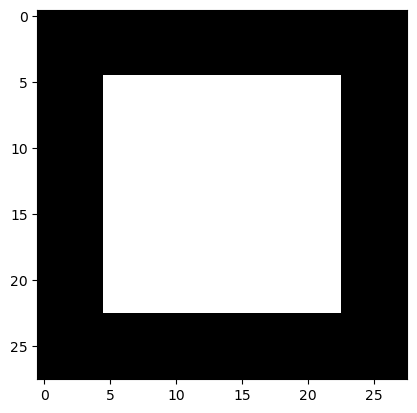



Final Output: 0

Prediction (Softmax) from the neural network:

 [[0.47336334 0.0014988  0.02112627 0.00176772 0.03293097 0.0156992
  0.17183475 0.00091239 0.26029515 0.02057143]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


1/1 [==============================] - 0s 19ms/step


---------------------------------------


=========PREDICTION============ 




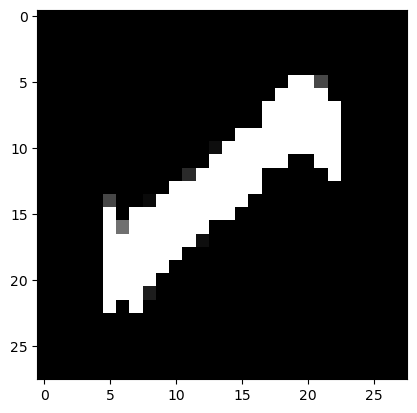



Final Output: 1

Prediction (Softmax) from the neural network:

 [[3.1376226e-04 9.6957570e-01 1.5937096e-02 1.3159118e-04 4.6272897e-03
  2.7155750e-03 8.5656397e-04 7.8204123e-04 4.9347728e-03 1.2559033e-04]]


Hard-maxed form of the prediction: 

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




In [ ]:
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))   
    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    print ("\n\n---------------------------------------\n\n")

In [ ]:
digit = preprocessed_digits[0]
prediction = model.predict(digit.reshape(1, 28, 28, 1))
print("=========PREDICTION============")
plt.imshow(digit.reshape(28, 28), cmap="gray")
plt.show()
print(f"\nFinal Output: {np.argmax(prediction)}")
print(f"\nPrediction (Softmax) from the neural network:\n\n {prediction}")
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print(f"\nHard-maxed form of the prediction: \n\n {hard_maxed_prediction}")

In [ ]:
generateClassifier.py
performClassifier.py
#!/usr/bin/python
# Import the modules
import cv2
from sklearn.externals import joblib
from skimage.feature import hog
import numpy as np
import argparse as ap
# Get the path of the training set
parser = ap.ArgumentParser()
parser.add_argument("-c", "--classiferPath", help="Path to Classifier File", required="True")
parser.add_argument("-i", "--image", help="Path to Image", required="True")
args = vars(parser.parse_args())
# Load the classifier
clf, pp = joblib.load(args["classiferPath"])
# Read the input image 
im = cv2.imread(args["image"])
# Convert to grayscale and apply Gaussian filtering
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)
# Threshold the image
ret, im_th = cv2.threshold(im_gray, 90, 255, cv2.THRESH_BINARY_INV)
# Find contours in the image
ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in ctrs]
# For each rectangular region, calculate HOG features and predict
# the digit using classifier.
for rect in rects:
 # Draw the rectangles
 cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
 # Make the rectangular region around the digit
 leng = int(rect[3] * 1.6)
 pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
 pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
 roi = im_th[pt1:pt1+leng, pt2:pt2+leng]
 # Resize the image
 roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
 roi = cv2.dilate(roi, (3, 3))
 # Calculate the HOG features
 roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualise=False)
 roi_hog_fd = pp.transform(np.array([roi_hog_fd], 'float64'))
 nbr = clf.predict(roi_hog_fd)
 cv2.putText(im, str(int(nbr[0])), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 3)
cv2.namedWindow("Resulting Image with Rectangular ROIs", cv2.WINDOW_NORMAL)
cv2.imshow("Resulting Image with Rectangular ROIs", im)
cv2.waitKey()

# Import the modules
from sklearn.externals import joblib
from sklearn import datasets
from skimage.feature import hog
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
import numpy as np
from collections import Counter
# Load the dataset
dataset = datasets.fetch_mldata("MNIST Original")
# Extract the features and labels
features = np.array(dataset.data, 'int16') 
labels = np.array(dataset.target, 'int')
# Extract the hog features
list_hog_fd = []
for feature in features:
 fd = hog(feature.reshape((28, 28)), orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualise=False)
 list_hog_fd.append(fd)
hog_features = np.array(list_hog_fd, 'float64')
# Normalize the features
pp = preprocessing.StandardScaler().fit(hog_features)
hog_features = pp.transform(hog_features)
print ("Count of digits in dataset", Counter(labels))
# Create an MLP Neural Network object
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, 
 hidden_layer_sizes=(5, 2), random_state=1)
# Perform the training
clf.fit(hog_features, labels)
# Save the classifier
joblib.dump((clf, pp), "digits_nn.pkl", compress=3)
knn.py